In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("data/cleaned_student_lifestyle_dataset.csv")

In [4]:
df.head()

,student_id,study_hours_per_day,extracurricular_hours_per_day,sleep_hours_per_day,social_hours_per_day,physical_activity_hours_per_day,gpa,stress_level,stress_level_numeric,gpa_group
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate,2,2.5-3
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low,1,2.5-3
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low,1,2.5-3
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate,2,2.5-3
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High,3,3.5-4


### 1. Histogram of sleep hours

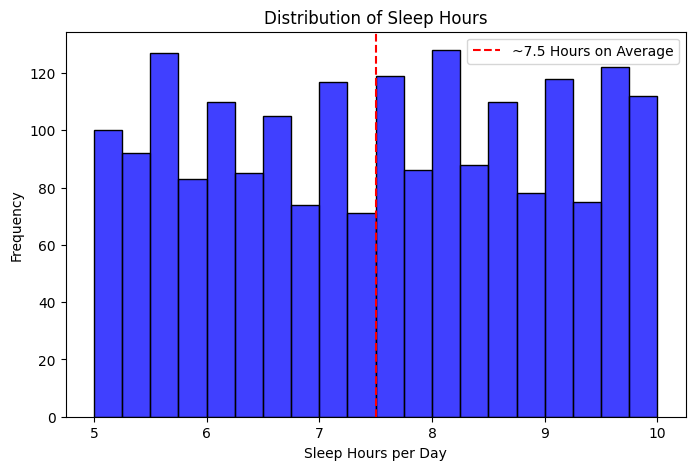

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(df['sleep_hours_per_day'], bins=20, color='blue')
plt.axvline(df['sleep_hours_per_day'].mean(), color='red', linestyle='--', label=f'~{df['sleep_hours_per_day'].mean():.1f} Hours on Average')
plt.title('Distribution of Sleep Hours')
plt.xlabel('Sleep Hours per Day')
plt.ylabel('Frequency')
plt.legend()
plt.show()